<a href="https://colab.research.google.com/github/muhammadmo/Larynx_cancer/blob/main/Larynx_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras==2.7.0

In [ ]:
pip install keras.utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2631 sha256=951d3db8fbc0c66cc9abb4b475a9947a7b9ddfc169f2a4e2fa5599ba0890f363
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras.utils


In [ ]:
pip install keras.metrics

In [ ]:
# feature extractoring and preprocessing data
import librosa
import librosa, librosa.display, os, csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler,scale
from sklearn.model_selection import GridSearchCV, train_test_split, RepeatedStratifiedKFold, cross_val_score, KFold,StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve,roc_auc_score, auc
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


#Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import models
from tensorflow import keras
# from keras import layers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
# from keras.utils import to_categorical
from keras.utils.np_utils import to_categorical


from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import xgboost as xgb
import joblib

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'keras.utils.np_utils'

In [ ]:
!conda install -c conda-forge keras-preprocessing

/bin/bash: line 1: conda: command not found


In [ ]:
directory_files = os.listdir('/content/DATA9/center')
directory_files

['0627-1-1-A.aac',
 '0718-2-1-E.m4a',
 '0529-1-1-A.aac',
 '0627-1-4-E.aac',
 '0620-2-1-E.m4a',
 '0608-1-3-A.aac',
 '0530-1-1-A.aac',
 '0605-1-3-A.aac',
 '0614-2-1-E.m4a',
 '0605-2-3-A.aac',
 '0531-1-2-A.aac',
 '0612-2-5-E.aac',
 '0806-2-2-O.m4a',
 '0626-2-3-O.aac',
 '0704-2-1-A.m4a',
 '0716-2-1-O.m4a',
 '0605-2-7-E.aac',
 '0817-2-1-O.m4a',
 '0629-2-1-O.aac',
 '0605-1-3-O.aac',
 '0612-2-1-O.aac',
 '0606-1-1-E.aac',
 '0608-2-2-A.aac',
 '0629-2-3-E.aac',
 '0529-1-2-E.aac',
 '0608-1-3-E.aac',
 '0626-2-4-E.aac',
 '0601-2-1-E.aac',
 '0723-2-1-O.m4a',
 '0629-1-1-E.aac',
 '0724-2-1-O.m4a',
 '0629-1-3-E.aac',
 '0607-1-1-A.aac',
 '0627-1-2-E.aac',
 '0606-1-2-A.aac',
 '0607-2-2-O.aac',
 '0611-2-2-O.aac',
 '0605-2-5-A.aac',
 '0605-2-5-E.aac',
 '0713-2-1-E.m4a',
 '0605-1-2-A.aac',
 '0531-2-1-O.aac',
 '0601-2-2-O.aac',
 '0612-2-2-E.aac',
 '0605-2-4-E.aac',
 '0613-2-5-A.m4a',
 '0612-2-1-E.aac',
 '0605-1-1-E.aac',
 '0531-2-4-A.aac',
 '0704-2-2-E.m4a',
 '0629-1-1-A.aac',
 '0626-2-1-E.m4a',
 '0807-2-1-E

In [ ]:
# Extracting features from Spectrogram
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()
print (header)

['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']


In [ ]:
from os import listdir
from os.path import isfile, join
files = [f for f in listdir('/content/DATA9/center') if isfile(join('/content/DATA9/center', f))]

In [ ]:
len(files)

429

source 1205-u_l-egg.wav

label COVID-19
source 1205-iau.wav

label COVID-19
source 1205-i_lhl.wav

label COVID-19
source 1205-u_n.wav

label COVID-19
source 1205-i_l.wav

label COVID-19
data
            filename  chroma_stft      rmse  spectral_centroid  \
0  1205-u_l-egg.wav     0.293224  0.204689        1579.710569   
1      1205-iau.wav     0.345394  0.101092        2155.329933   
2    1205-i_lhl.wav     0.206013  0.221229        1896.960648   
3      1205-u_n.wav     0.230086  0.146007         808.876102   
4      1205-i_l.wav     0.234145  0.119409        1557.624217   

   spectral_bandwidth      rolloff  zero_crossing_rate       mfcc1  \
0         2645.992269  3961.391602            0.011198 -162.553528   
1         2511.726136  4974.070231            0.053654 -274.786682   
2         2561.853166  4305.922852            0.033422 -158.718445   
3         1287.709023  1062.448242            0.024015 -266.789154   
4         2496.073057  3916.192986            0.022293 -253.001785 

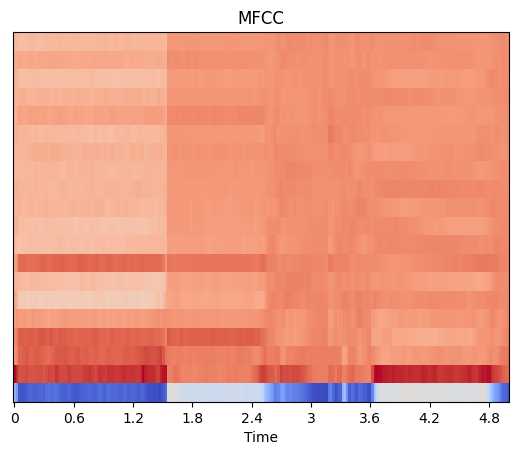

In [ ]:
# Writing data to csv file

file = open('Laryngozele.csv', 'w')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
data = pd.read_csv('/content/Laryngozele.csv')
#print ('data\n',data)
for i in range(len(COVIDfiles)):
        source = COVIDfiles[i]
        print ('source',source)
        file_name = '/content/testt/'+source
        label =  'Laryngocele'
        print ('\nlabel', label)
        y,sr = librosa.load(file_name, mono=True, duration=5)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr,hop_length=1024)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr,hop_length=1024)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr,hop_length=1024)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        #print ('mfcc',mfcc)
        to_append = f'{np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
        librosa.display.specshow(mfcc, x_axis='time') #Show MFCC
        plt.title('MFCC')
        #plt.show()

        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {label}'
        value = [str(source)]
        value.extend(to_append.split())
        file = open('Laryngozele.csv', 'a')
        with file:
            writer = csv.writer(file)
            writer.writerow(value)

data = pd.read_csv('/content/Laryngozele.csv')
print ('data\n',data)

In [ ]:
import pandas as pd
data = pd.read_csv('/content/data_new_extended.csv')
data1 = pd.read_csv('/content/data_new_extended.csv')

In [ ]:
data

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0627-1-1-A.aac,0.417858,0.020441,1816.785026,2158.814488,3963.006592,0.081190,-400.593597,123.528740,7.335978,...,5.211065,-0.780378,-7.708874,2.685667,-19.749250,-0.442526,-14.518474,-3.906976,-3.318657,1
1,0718-2-1-E.m4a,0.194540,0.062093,1522.808310,2177.740881,3543.029631,0.055658,-300.843506,99.434822,18.541452,...,2.871132,-7.010853,-6.341543,6.195769,-10.788597,0.312054,-5.201145,3.139344,-8.890065,1
2,0529-1-1-A.aac,0.234089,0.040248,1696.341541,2213.730806,4752.504596,0.062522,-332.957855,133.637085,7.428734,...,-0.918960,0.434985,-19.679977,7.785558,-29.781197,7.970500,-3.220012,-13.774394,-3.482406,1
3,0627-1-4-E.aac,0.167570,0.085036,2017.785824,2380.091800,4574.320616,0.038111,-343.253662,61.178841,20.455194,...,3.006991,-16.096798,-17.568363,-0.705065,-18.474516,0.626808,-15.202579,-1.367784,-13.957106,1
4,0620-2-1-E.m4a,0.161340,0.078676,1263.806772,1805.522605,3291.957444,0.032598,-296.461334,122.744560,3.758279,...,5.145417,-6.270977,-11.306344,5.848499,-16.391283,-0.362570,-10.859072,-1.509002,-9.583907,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,0628-2-3-A.aac,0.343860,0.074675,1303.068301,1753.916831,2385.820708,0.054589,-346.601654,126.073586,14.244988,...,10.477819,-10.762454,-2.217643,-4.593821,-17.419182,-0.388614,-6.698251,-2.839631,-6.790473,1
425,0629-1-2-A.aac,0.363134,0.071439,1239.125501,1694.176439,2074.984005,0.050091,-333.175201,149.909958,5.330978,...,8.397094,-5.384014,-11.063236,13.408337,-23.270483,-3.917316,-15.333302,1.654932,-7.137526,1
426,0606-1-2-O.aac,0.307657,0.045778,1180.366705,1718.273449,2234.518433,0.041919,-400.938660,131.057404,36.650425,...,-11.914540,-11.793766,-14.758993,-9.049486,-6.376181,-3.917724,-2.769795,4.626912,-10.366613,1
427,0626-2-2-A.aac,0.297667,0.121885,1053.137121,1423.426998,1391.711426,0.050938,-278.358398,162.735764,4.989657,...,1.935574,4.194615,-8.938853,18.320808,-23.317741,-9.967698,-8.049315,-8.920160,-3.511220,1


In [ ]:
df = data.drop('Label', axis=1)
df

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc19,mfcc20,City,Age,Weight,Gender,Drugs,Cigarettes,Stomach Reflex,Stressful Lifestyle
0,0529-1-1-A.aac,0.197994,0.203548,0.430375,0.649449,0.668477,0.198926,0.462830,0.520096,0.407282,...,0.057692,0.564330,Kerman,0.791667,0.481481,0,0,1,0,1
1,0529-1-1-E.aac,0.031899,0.264555,0.336550,0.543550,0.519208,0.077673,0.401504,0.244438,0.461767,...,0.124894,0.437085,Kerman,0.791667,0.481481,0,0,1,0,1
2,0529-1-1-O.aac,0.000000,0.377942,0.062070,0.260512,0.027924,0.054791,0.307557,0.569329,0.676162,...,0.399196,0.620621,Kerman,0.791667,0.481481,0,0,1,0,1
3,0529-1-2-A.aac,0.461587,0.208842,0.317073,0.479212,0.329147,0.107983,0.390883,0.539777,0.130620,...,0.079374,0.319337,Kerman,0.555556,0.648148,0,1,1,0,0
4,0529-1-2-E.aac,0.395611,0.300778,0.400873,0.569388,0.537682,0.179857,0.332386,0.193041,0.429053,...,0.364398,0.595700,Kerman,0.555556,0.648148,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0713-2-1-E.m4a,0.283366,0.176746,0.368764,0.626724,0.485113,0.162366,0.430474,0.374567,0.573709,...,0.447064,0.570902,Kerman,0.694444,0.648148,0,1,1,0,0
311,0713-2-1-O.m4a,0.375857,0.134273,0.245386,0.448778,0.286343,0.136314,0.390838,0.586333,0.509866,...,0.547314,0.510928,Kerman,0.694444,0.648148,0,1,1,0,0
312,0713-2-2-A.m4a,0.649903,0.233977,0.079082,0.348339,0.100455,0.027006,0.507238,0.745029,0.716903,...,0.529408,1.000000,zarand,0.513889,0.750000,1,0,1,0,0
313,0713-2-2-E.m4a,0.439275,0.264613,0.194470,0.501208,0.277181,0.041481,0.549686,0.461194,0.572404,...,0.652259,0.607404,zarand,0.513889,0.750000,1,0,1,0,0


In [ ]:
X = df
y = data["Label"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc19,mfcc20,City,Age,Weight,Gender,Drugs,Cigarettes,Stomach Reflex,Stressful Lifestyle
221,0627-1-2-O.aac,0.389210,0.411800,0.399976,0.661989,0.599588,0.134515,0.325287,0.287269,0.669424,...,0.435116,0.488856,ghaleganj,0.263889,0.444444,1,0,1,0,0
132,0608-1-2-A.aac,0.515933,0.179495,0.376494,0.473572,0.468337,0.198997,0.446248,0.505684,0.318037,...,0.578229,0.433946,bam,0.500000,0.518519,0,1,1,0,1
155,0611-2-2-O.aac,0.453010,0.195486,0.224346,0.434608,0.244067,0.108407,0.244881,0.535917,0.507509,...,0.192413,0.442825,baghin,0.402778,0.444444,0,1,1,0,1
94,0605-2-2-E.aac,0.428350,0.321059,0.608782,0.761542,0.730437,0.224658,0.544208,0.251735,0.307271,...,0.796916,0.200388,rafsanjan,0.555556,0.453704,1,0,1,0,1
245,0628-2-2-O.aac,0.346451,0.329166,0.237686,0.438975,0.259188,0.080104,0.337922,0.461301,0.532815,...,0.319876,0.518031,Kerman,0.333333,0.564815,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0614-2-1-O.m4a,0.314976,0.535644,0.011193,0.141347,0.056119,0.051836,0.288982,0.715977,0.847456,...,0.809387,0.750691,Kerman,0.736111,0.657407,1,1,0,0,0
71,0601-2-4-O.aac,0.413725,0.485688,0.235425,0.467014,0.220246,0.078373,0.385564,0.415160,0.758643,...,0.532091,0.450754,Kerman,0.486111,0.425926,0,1,1,1,0
106,0605-2-6-E.aac,0.450537,0.479632,0.382245,0.568037,0.451165,0.138997,0.458289,0.208140,0.525847,...,0.358351,0.344591,rabor,0.694444,0.435185,0,1,1,0,1
270,0629-2-4-A.m4a,0.380283,0.319123,0.134482,0.271009,0.136179,0.086293,0.562606,0.720696,0.535162,...,0.606452,0.430933,Kerman,0.416667,0.629630,0,1,1,0,1


In [ ]:
X_test = X_test.drop('filename', axis=1)
X_train = X_train.drop('filename', axis=1)

In [ ]:
X_test = X_test.drop('City', axis=1)
X_train = X_train.drop('City', axis=1)

In [ ]:
X_train. isnull().values.any()

False

In [ ]:
#over/under sampling
!pip install -U imbalanced-learn

from sklearn. datasets import make_classification

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

from sklearn import datasets
from sklearn import svm
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import naive_bayes
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier

In [ ]:
print("Number of training records is ", X_train.shape[0])
print("Number of testing records is ", X_test.shape[0])

Number of training records is  252
Number of testing records is  63


In [ ]:
print(sorted(Counter(y_test).items()))

[(0, 19), (1, 118), (2, 70)]


In [ ]:
#RUS
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
print(sorted(Counter(y_train_rus).items()))

[(0, 63), (1, 63), (2, 63)]


In [ ]:
#E

In [ ]:
import pandas as pd
data_e = pd.read_csv('/content/e.csv')
data1_e = pd.read_csv('/content/e.csv')

In [ ]:
data_e

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc20,City,Age,Weight,Gender,Drugs,Cigarettes,Stomach Reflex,Stressful Lifestyle,Label
0,0529-1-1-E.aac,0.031899,0.264555,0.336550,0.543550,0.519208,0.077673,0.401504,0.244438,0.461767,...,0.437085,Kerman,0.791667,0.481481,0,0,1,0,1,2
1,0529-1-2-E.aac,0.395611,0.300778,0.400873,0.569388,0.537682,0.179857,0.332386,0.193041,0.429053,...,0.595700,Kerman,0.555556,0.648148,0,1,1,0,0,2
2,0529-1-3-E.aac,0.312266,0.181843,0.458841,0.715848,0.649567,0.126425,0.383955,0.311009,0.608535,...,0.431533,jiroft,0.250000,0.351852,0,1,1,1,1,2
3,0529-1-4-E.aac,0.321369,0.202888,0.431825,0.559745,0.564735,0.091387,0.419921,0.279304,0.344585,...,0.466447,Kerman,0.638889,0.648148,1,0,0,0,0,2
4,0529-1-5-E.aac,0.472853,0.084382,0.406896,0.677085,0.633736,0.135175,0.224878,0.364906,0.555977,...,0.357691,rafsanjan,0.513889,0.629630,1,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0709-2-2-E.m4a,0.166012,0.515161,0.439741,0.690669,0.465539,0.096787,0.604272,0.165595,0.498660,...,0.375037,Kerman,0.472222,0.648148,0,1,0,0,0,2
101,0712-2-1-E.m4a,0.202135,0.649939,0.395806,0.658134,0.512283,0.063254,0.825910,0.197026,0.549217,...,0.329660,kerman,0.736111,0.796296,1,0,1,0,0,2
102,0712-2-2-E.m4a,0.117454,0.588678,0.139618,0.493002,0.154975,0.023952,0.646945,0.470096,0.652628,...,0.529781,jiroft,0.347222,0.574074,0,1,1,0,0,2
103,0713-2-1-E.m4a,0.283366,0.176746,0.368764,0.626724,0.485113,0.162366,0.430474,0.374567,0.573709,...,0.570902,Kerman,0.694444,0.648148,0,1,1,0,0,2


In [ ]:
df_e = data_e.drop('Label', axis=1)
df_e

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc19,mfcc20,City,Age,Weight,Gender,Drugs,Cigarettes,Stomach Reflex,Stressful Lifestyle
0,0529-1-1-E.aac,0.031899,0.264555,0.336550,0.543550,0.519208,0.077673,0.401504,0.244438,0.461767,...,0.124894,0.437085,Kerman,0.791667,0.481481,0,0,1,0,1
1,0529-1-2-E.aac,0.395611,0.300778,0.400873,0.569388,0.537682,0.179857,0.332386,0.193041,0.429053,...,0.364398,0.595700,Kerman,0.555556,0.648148,0,1,1,0,0
2,0529-1-3-E.aac,0.312266,0.181843,0.458841,0.715848,0.649567,0.126425,0.383955,0.311009,0.608535,...,0.481910,0.431533,jiroft,0.250000,0.351852,0,1,1,1,1
3,0529-1-4-E.aac,0.321369,0.202888,0.431825,0.559745,0.564735,0.091387,0.419921,0.279304,0.344585,...,0.443300,0.466447,Kerman,0.638889,0.648148,1,0,0,0,0
4,0529-1-5-E.aac,0.472853,0.084382,0.406896,0.677085,0.633736,0.135175,0.224878,0.364906,0.555977,...,0.788220,0.357691,rafsanjan,0.513889,0.629630,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0709-2-2-E.m4a,0.166012,0.515161,0.439741,0.690669,0.465539,0.096787,0.604272,0.165595,0.498660,...,0.681872,0.375037,Kerman,0.472222,0.648148,0,1,0,0,0
101,0712-2-1-E.m4a,0.202135,0.649939,0.395806,0.658134,0.512283,0.063254,0.825910,0.197026,0.549217,...,0.735380,0.329660,kerman,0.736111,0.796296,1,0,1,0,0
102,0712-2-2-E.m4a,0.117454,0.588678,0.139618,0.493002,0.154975,0.023952,0.646945,0.470096,0.652628,...,0.543406,0.529781,jiroft,0.347222,0.574074,0,1,1,0,0
103,0713-2-1-E.m4a,0.283366,0.176746,0.368764,0.626724,0.485113,0.162366,0.430474,0.374567,0.573709,...,0.447064,0.570902,Kerman,0.694444,0.648148,0,1,1,0,0


In [ ]:
X = df_e
y = data_e["Label"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
X_test = X_test.drop('filename', axis=1)
X_train = X_train.drop('filename', axis=1)
X_test = X_test.drop('City', axis=1)
X_train = X_train.drop('City', axis=1)

In [ ]:
X_train. isnull().values.any()

False

In [ ]:
#over/under sampling
!pip install -U imbalanced-learn

from sklearn. datasets import make_classification

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

from sklearn import datasets
from sklearn import svm
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import naive_bayes
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
print("Number of training records is ", X_train.shape[0])
print("Number of testing records is ", X_test.shape[0])

Number of training records is  94
Number of testing records is  11


In [ ]:
#RUS_A
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
print(sorted(Counter(y_train_rus).items()))

[(0, 18), (1, 18), (2, 18)]


In [ ]:
#A

In [ ]:
import pandas as pd
data_a = pd.read_csv('/content/a.csv')
data1_a = pd.read_csv('/content/a.csv')

In [ ]:
data_a

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc20,City,Age,Weight,Gender,Drugs,Cigarettes,Stomach Reflex,Stressful Lifestyle,Label
0,0529-1-1-A.aac,0.197994,0.203548,0.430375,0.649449,0.668477,0.198926,0.462830,0.520096,0.407282,...,0.564330,Kerman,0.791667,0.481481,0,0,1,0,1,2
1,0529-1-2-A.aac,0.461587,0.208842,0.317073,0.479212,0.329147,0.107983,0.390883,0.539777,0.130620,...,0.319337,Kerman,0.555556,0.648148,0,1,1,0,0,2
2,0529-1-3-A.aac,0.443600,0.066427,0.433907,0.604123,0.529742,0.196703,0.296511,0.436279,0.413350,...,0.357870,jiroft,0.250000,0.351852,0,1,1,1,1,2
3,0529-1-4-A.aac,0.620898,0.042435,0.405126,0.556501,0.532874,0.199180,0.329581,0.582024,0.317724,...,0.536278,Kerman,0.638889,0.648148,1,0,0,0,0,2
4,0529-1-5-A.aac,0.747912,0.073100,0.170772,0.393521,0.182344,0.052981,0.213296,0.709861,0.538477,...,0.614214,rafsanjan,0.513889,0.629630,1,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0709-2-2-A.m4a,0.169331,0.491935,0.238998,0.304755,0.290509,0.156353,0.710838,0.578983,0.134548,...,0.093033,Kerman,0.472222,0.648148,0,1,0,0,0,2
101,0712-2-1-A.m4a,0.398278,0.467005,0.263515,0.426631,0.319370,0.187180,0.914583,0.634427,0.467226,...,0.515160,kerman,0.736111,0.796296,1,0,1,0,0,2
102,0712-2-2-A.m4a,0.165243,0.455543,0.192667,0.412876,0.123701,0.183784,0.735538,0.652884,0.455932,...,0.172188,jiroft,0.347222,0.574074,0,1,1,0,0,2
103,0713-2-1-A.m4a,0.223508,0.247207,0.110079,0.264700,0.131195,0.047802,0.374659,0.715815,0.435360,...,0.281290,Kerman,0.694444,0.648148,0,1,1,0,0,2


In [ ]:
df_a = data_a.drop('Label', axis=1)
df_a

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc19,mfcc20,City,Age,Weight,Gender,Drugs,Cigarettes,Stomach Reflex,Stressful Lifestyle
0,0529-1-1-A.aac,0.197994,0.203548,0.430375,0.649449,0.668477,0.198926,0.462830,0.520096,0.407282,...,0.057692,0.564330,Kerman,0.791667,0.481481,0,0,1,0,1
1,0529-1-2-A.aac,0.461587,0.208842,0.317073,0.479212,0.329147,0.107983,0.390883,0.539777,0.130620,...,0.079374,0.319337,Kerman,0.555556,0.648148,0,1,1,0,0
2,0529-1-3-A.aac,0.443600,0.066427,0.433907,0.604123,0.529742,0.196703,0.296511,0.436279,0.413350,...,0.507343,0.357870,jiroft,0.250000,0.351852,0,1,1,1,1
3,0529-1-4-A.aac,0.620898,0.042435,0.405126,0.556501,0.532874,0.199180,0.329581,0.582024,0.317724,...,0.421027,0.536278,Kerman,0.638889,0.648148,1,0,0,0,0
4,0529-1-5-A.aac,0.747912,0.073100,0.170772,0.393521,0.182344,0.052981,0.213296,0.709861,0.538477,...,0.257923,0.614214,rafsanjan,0.513889,0.629630,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0709-2-2-A.m4a,0.169331,0.491935,0.238998,0.304755,0.290509,0.156353,0.710838,0.578983,0.134548,...,0.540522,0.093033,Kerman,0.472222,0.648148,0,1,0,0,0
101,0712-2-1-A.m4a,0.398278,0.467005,0.263515,0.426631,0.319370,0.187180,0.914583,0.634427,0.467226,...,0.555514,0.515160,kerman,0.736111,0.796296,1,0,1,0,0
102,0712-2-2-A.m4a,0.165243,0.455543,0.192667,0.412876,0.123701,0.183784,0.735538,0.652884,0.455932,...,0.821697,0.172188,jiroft,0.347222,0.574074,0,1,1,0,0
103,0713-2-1-A.m4a,0.223508,0.247207,0.110079,0.264700,0.131195,0.047802,0.374659,0.715815,0.435360,...,0.370391,0.281290,Kerman,0.694444,0.648148,0,1,1,0,0


In [ ]:
X = df_a
y = data_a["Label"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
X_test = X_test.drop('filename', axis=1)
X_train = X_train.drop('filename', axis=1)
X_test = X_test.drop('City', axis=1)
X_train = X_train.drop('City', axis=1)

In [ ]:
X_train. isnull().values.any()

False

In [ ]:
#RUS
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
print(sorted(Counter(y_train_rus).items()))

In [ ]:
#O

In [ ]:
import pandas as pd
data_o = pd.read_csv('/content/o.csv')
data1_o = pd.read_csv('/content/o.csv')

In [ ]:
data_o

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc20,City,Age,Weight,Gender,Drugs,Cigarettes,Stomach Reflex,Stressful Lifestyle,Label
0,0529-1-1-O.aac,0.000000,0.377942,0.062070,0.260512,0.027924,0.054791,0.307557,0.569329,0.676162,...,0.620621,Kerman,0.791667,0.481481,0,0,1,0,1,2
1,0529-1-2-O.aac,0.375155,0.227786,0.196671,0.340626,0.242857,0.104997,0.173225,0.544279,0.613896,...,0.641090,Kerman,0.555556,0.648148,0,1,1,0,0,2
2,0529-1-3-O.aac,0.262584,0.124880,0.267422,0.508667,0.326949,0.097341,0.181767,0.459943,0.544438,...,0.377478,jiroft,0.250000,0.351852,0,1,1,1,1,2
3,0529-1-4-O.aac,0.241641,0.148271,0.047498,0.268870,0.026787,0.035198,0.171733,0.695634,0.719268,...,0.707752,Kerman,0.638889,0.648148,1,0,0,0,0,2
4,0529-1-5-O.aac,0.216705,0.107299,0.150436,0.352445,0.183337,0.069792,0.167150,0.655521,0.543790,...,0.690045,rafsanjan,0.513889,0.629630,1,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0709-2-2-O.m4a,0.027345,0.704493,0.079551,0.245804,0.073272,0.081670,0.466606,0.601574,0.758200,...,0.636534,Kerman,0.472222,0.648148,0,1,0,0,0,2
101,0712-2-1-O.m4a,0.070042,0.703608,0.007472,0.175002,0.020534,0.018769,0.578971,0.692743,0.640565,...,0.619072,kerman,0.736111,0.796296,1,0,1,0,0,2
102,0712-2-2-O.m4a,0.020604,0.681049,0.009074,0.192517,0.025622,0.030488,0.534249,0.734240,0.618672,...,0.252052,jiroft,0.347222,0.574074,0,1,1,0,0,2
103,0713-2-1-O.m4a,0.375857,0.134273,0.245386,0.448778,0.286343,0.136314,0.390838,0.586333,0.509866,...,0.510928,Kerman,0.694444,0.648148,0,1,1,0,0,2


In [ ]:
df_o = data_o.drop('Label', axis=1)
df_o

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc19,mfcc20,City,Age,Weight,Gender,Drugs,Cigarettes,Stomach Reflex,Stressful Lifestyle
0,0529-1-1-O.aac,0.000000,0.377942,0.062070,0.260512,0.027924,0.054791,0.307557,0.569329,0.676162,...,0.399196,0.620621,Kerman,0.791667,0.481481,0,0,1,0,1
1,0529-1-2-O.aac,0.375155,0.227786,0.196671,0.340626,0.242857,0.104997,0.173225,0.544279,0.613896,...,0.190032,0.641090,Kerman,0.555556,0.648148,0,1,1,0,0
2,0529-1-3-O.aac,0.262584,0.124880,0.267422,0.508667,0.326949,0.097341,0.181767,0.459943,0.544438,...,0.496046,0.377478,jiroft,0.250000,0.351852,0,1,1,1,1
3,0529-1-4-O.aac,0.241641,0.148271,0.047498,0.268870,0.026787,0.035198,0.171733,0.695634,0.719268,...,0.547651,0.707752,Kerman,0.638889,0.648148,1,0,0,0,0
4,0529-1-5-O.aac,0.216705,0.107299,0.150436,0.352445,0.183337,0.069792,0.167150,0.655521,0.543790,...,0.618805,0.690045,rafsanjan,0.513889,0.629630,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0709-2-2-O.m4a,0.027345,0.704493,0.079551,0.245804,0.073272,0.081670,0.466606,0.601574,0.758200,...,0.389094,0.636534,Kerman,0.472222,0.648148,0,1,0,0,0
101,0712-2-1-O.m4a,0.070042,0.703608,0.007472,0.175002,0.020534,0.018769,0.578971,0.692743,0.640565,...,0.275131,0.619072,kerman,0.736111,0.796296,1,0,1,0,0
102,0712-2-2-O.m4a,0.020604,0.681049,0.009074,0.192517,0.025622,0.030488,0.534249,0.734240,0.618672,...,0.563087,0.252052,jiroft,0.347222,0.574074,0,1,1,0,0
103,0713-2-1-O.m4a,0.375857,0.134273,0.245386,0.448778,0.286343,0.136314,0.390838,0.586333,0.509866,...,0.547314,0.510928,Kerman,0.694444,0.648148,0,1,1,0,0


In [ ]:
X = df_o
y = data_o["Label"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
X_test = X_test.drop('filename', axis=1)
X_train = X_train.drop('filename', axis=1)
X_test = X_test.drop('City', axis=1)
X_train = X_train.drop('City', axis=1)

In [ ]:
X_train. isnull().values.any()

False

In [ ]:
#RUS
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
print(sorted(Counter(y_train_rus).items()))

[(0, 18), (1, 18), (2, 18)]


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_clf = SVC(C=30,kernel="rbf")
svm_clf.fit(X_train, y_train)

SVC(C=30)

In [ ]:
y_pred = svm_clf.predict(X_test)
accuracy_score(y_test, y_pred)
print("accuracy: ",accuracy_score(y_test, y_pred))

accuracy:  0.8095238095238095


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels=[0, 1, 2]))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70        10
           1       0.71      0.67      0.69        15
           2       0.92      0.87      0.89        38

    accuracy                           0.81        63
   macro avg       0.75      0.78      0.76        63
weighted avg       0.82      0.81      0.81        63



In [ ]:
print(metrics.confusion_matrix(y_test,y_pred=y_pred))

[[ 8  2  0]
 [ 2 10  3]
 [ 3  2 33]]


In [ ]:
#A

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_clf = SVC(C=0.1,kernel="linear")
svm_clf.fit(X_train_rus, y_train_rus)

SVC(C=0.1, kernel='linear')

In [ ]:
y_pred = svm_clf.predict(X_test)
accuracy_score(y_test, y_pred)
print("accuracy: ",accuracy_score(y_test, y_pred))

accuracy:  0.8181818181818182


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels=[0, 1, 2]))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.75      1.00      0.86         3
           2       1.00      0.67      0.80         6

    accuracy                           0.82        11
   macro avg       0.81      0.89      0.82        11
weighted avg       0.87      0.82      0.82        11



In [ ]:
print(metrics.confusion_matrix(y_test,y_pred=y_pred))

[[2 0 0]
 [0 3 0]
 [1 1 4]]


In [ ]:
#E

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_clf = SVC(C=0.09,kernel="rbf")
svm_clf.fit(X_train_rus, y_train_rus)

SVC(C=0.09)

In [ ]:
y_pred = svm_clf.predict(X_test)
accuracy_score(y_test, y_pred)
print("accuracy: ",accuracy_score(y_test, y_pred))

accuracy:  0.7272727272727273


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels=[0, 1, 2]))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.75      1.00      0.86         3
           2       1.00      0.50      0.67         6

    accuracy                           0.73        11
   macro avg       0.75      0.83      0.73        11
weighted avg       0.84      0.73      0.72        11



In [ ]:
print(metrics.confusion_matrix(y_test,y_pred=y_pred))

[[2 0 0]
 [0 3 0]
 [2 1 3]]


In [ ]:
#O

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_clf = SVC(C=0.1,kernel="linear")
svm_clf.fit(X_train_rus, y_train_rus)

SVC(C=0.1, kernel='linear')

In [ ]:
y_pred = svm_clf.predict(X_test)
accuracy_score(y_test, y_pred)
print("accuracy: ",accuracy_score(y_test, y_pred))

accuracy:  0.8181818181818182


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels=[0, 1, 2]))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.75      1.00      0.86         3
           2       1.00      0.67      0.80         6

    accuracy                           0.82        11
   macro avg       0.81      0.89      0.82        11
weighted avg       0.87      0.82      0.82        11



In [ ]:
print(metrics.confusion_matrix(y_test,y_pred=y_pred))

[[2 0 0]
 [0 3 0]
 [1 1 4]]


In [ ]:
#DT
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=6)
clf = clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)
print("accuracy: ",accuracy_score(y_test, y_pred))

accuracy:  0.7142857142857143


In [ ]:
print(classification_report(y_test, y_pred, labels=[0, 1, 2]))

              precision    recall  f1-score   support

           0       0.50      0.37      0.42        19
           1       0.82      0.83      0.83       118
           2       0.69      0.73      0.71        70

    accuracy                           0.75       207
   macro avg       0.67      0.64      0.65       207
weighted avg       0.75      0.75      0.75       207



In [ ]:
#A

In [ ]:
#DT
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=6)
clf = clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)
print("accuracy: ",accuracy_score(y_test, y_pred))

accuracy:  0.6363636363636364


In [ ]:
print(classification_report(y_test, y_pred, labels=[0, 1, 2]))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.50      0.67      0.57         3
           2       0.80      0.67      0.73         6

    accuracy                           0.64        11
   macro avg       0.60      0.61      0.60        11
weighted avg       0.66      0.64      0.64        11



In [ ]:
print(metrics.confusion_matrix(y_test,y_pred=y_pred))

[[1 1 0]
 [0 2 1]
 [1 1 4]]


In [ ]:
#E

In [ ]:
#DT
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=15)
clf = clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)
print("accuracy: ",accuracy_score(y_test, y_pred))

accuracy:  0.6363636363636364


In [ ]:
print(classification_report(y_test, y_pred, labels=[0, 1, 2]))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.50      1.00      0.67         3
           2       1.00      0.50      0.67         6

    accuracy                           0.64        11
   macro avg       0.67      0.67      0.61        11
weighted avg       0.77      0.64      0.64        11



In [ ]:
print(metrics.confusion_matrix(y_test,y_pred=y_pred))

[[1 1 0]
 [0 3 0]
 [1 2 3]]


In [ ]:
#O

In [ ]:
#DT
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=8)
clf = clf.fit(X_train_rus, y_train_rus)

In [ ]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)
print("accuracy: ",accuracy_score(y_test, y_pred))

accuracy:  0.8181818181818182


In [ ]:
print(classification_report(y_test, y_pred, labels=[0, 1, 2]))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.75      1.00      0.86         3
           2       1.00      0.67      0.80         6

    accuracy                           0.82        11
   macro avg       0.81      0.89      0.82        11
weighted avg       0.87      0.82      0.82        11



In [ ]:
print(metrics.confusion_matrix(y_test,y_pred=y_pred))

[[2 0 0]
 [0 3 0]
 [1 1 4]]


In [ ]:
#DT
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=6)
clf = clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)
print("accuracy: ",accuracy_score(y_test, y_pred))

accuracy:  0.7272727272727273


In [ ]:
print(classification_report(y_test, y_pred, labels=[0, 1, 2]))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      0.67      0.57         3
           2       0.83      0.83      0.83         6

    accuracy                           0.73        11
   macro avg       0.78      0.67      0.69        11
weighted avg       0.77      0.73      0.73        11



In [ ]:
print(metrics.confusion_matrix(y_test,y_pred=y_pred))

[[1 1 0]
 [0 2 1]
 [0 1 5]]


In [ ]:
#RF
#A

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
params_rf = {'n_estimators': [50, 100, 200]}
rf_gs = GridSearchCV(rf, params_rf, cv=5)
rf_gs.fit(X_train_rus, y_train_rus)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 200]})

In [ ]:
y_pred = rf_gs.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.6363636363636364


In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.50      0.67      0.57         3
           2       1.00      0.67      0.80         6

    accuracy                           0.64        11
   macro avg       0.61      0.61      0.59        11
weighted avg       0.74      0.64      0.66        11



In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))

[[1 1 0]
 [1 2 0]
 [1 1 4]]


In [ ]:
#RF
#E

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
params_rf = {'n_estimators': [50, 100, 200]}
rf_gs = GridSearchCV(rf, params_rf, cv=10)
rf_gs.fit(X_train_rus, y_train_rus)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 200]})

In [ ]:
y_pred = rf_gs.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7272727272727273


In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.75      1.00      0.86         3
           2       1.00      0.50      0.67         6

    accuracy                           0.73        11
   macro avg       0.75      0.83      0.73        11
weighted avg       0.84      0.73      0.72        11



In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))

[[2 0 0]
 [0 3 0]
 [2 1 3]]


In [ ]:
#RF
#O

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
params_rf = {'n_estimators': [50, 100, 200]}
rf_gs = GridSearchCV(rf, params_rf, cv=3)
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 200]})

In [ ]:
y_pred = rf_gs.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.6363636363636364


In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.33      0.40         3
           2       0.67      1.00      0.80         6

    accuracy                           0.64        11
   macro avg       0.39      0.44      0.40        11
weighted avg       0.50      0.64      0.55        11



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))

[[0 1 1]
 [0 1 2]
 [0 0 6]]


In [ ]:
#NB
#A

In [ ]:
NB_clf = naive_bayes.GaussianNB(var_smoothing=15e-01)
NB_clf = NB_clf.fit(X_train_rus, y_train_rus)
y_pred = NB_clf.predict(X_test)

In [ ]:
print(metrics.accuracy_score(y_test, y_pred))

0.6363636363636364


In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      1.00      0.57         2
           1       0.67      0.67      0.67         3
           2       1.00      0.50      0.67         6

    accuracy                           0.64        11
   macro avg       0.69      0.72      0.63        11
weighted avg       0.80      0.64      0.65        11



In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))

[[2 0 0]
 [1 2 0]
 [2 1 3]]


In [ ]:
#NB
#E

In [ ]:
NB_clf = naive_bayes.GaussianNB(var_smoothing=15e-01)
NB_clf = NB_clf.fit(X_train_rus, y_train_rus)
y_pred = NB_clf.predict(X_test)

In [ ]:
print(metrics.accuracy_score(y_test, y_pred))

0.7272727272727273


In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.75      1.00      0.86         3
           2       1.00      0.50      0.67         6

    accuracy                           0.73        11
   macro avg       0.75      0.83      0.73        11
weighted avg       0.84      0.73      0.72        11



In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))

[[2 0 0]
 [0 3 0]
 [2 1 3]]


In [ ]:
#NB
#O

In [ ]:
NB_clf = naive_bayes.GaussianNB(var_smoothing=15e-01)
NB_clf = NB_clf.fit(X_train_rus, y_train_rus)
y_pred = NB_clf.predict(X_test)

In [ ]:
print(metrics.accuracy_score(y_test, y_pred))

0.7272727272727273


In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.67      0.67      0.67         3
           2       1.00      0.67      0.80         6

    accuracy                           0.73        11
   macro avg       0.72      0.78      0.71        11
weighted avg       0.82      0.73      0.74        11



In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))

[[2 0 0]
 [1 2 0]
 [1 1 4]]


In [ ]:
#MLP
#A
MLP_clf = MLPClassifier(alpha=8, max_iter=1000)
MLP_clf = MLP_clf.fit(X_train_rus, y_train_rus)
y_pred = MLP_clf.predict(X_test)

In [ ]:
print(metrics.accuracy_score(y_test, y_pred))

0.7272727272727273


In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         3
           2       1.00      0.67      0.80         6

    accuracy                           0.73        11
   macro avg       0.83      0.72      0.71        11
weighted avg       0.86      0.73      0.74        11



In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))

[[1 1 0]
 [0 3 0]
 [0 2 4]]


In [ ]:
#MLP
#E
MLP_clf = MLPClassifier(alpha=8, max_iter=1000)
MLP_clf = MLP_clf.fit(X_train_rus, y_train_rus)
y_pred = MLP_clf.predict(X_test)

In [ ]:
print(metrics.accuracy_score(y_test, y_pred))

0.8181818181818182


In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.75      1.00      0.86         3
           2       1.00      0.67      0.80         6

    accuracy                           0.82        11
   macro avg       0.81      0.89      0.82        11
weighted avg       0.87      0.82      0.82        11



In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))

[[2 0 0]
 [0 3 0]
 [1 1 4]]


In [ ]:
#MLP
#O
MLP_clf = MLPClassifier(alpha=10, max_iter=1000)
MLP_clf = MLP_clf.fit(X_train_rus, y_train_rus)
y_pred = MLP_clf.predict(X_test)

In [ ]:
print(metrics.accuracy_score(y_test, y_pred))

0.8181818181818182


In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.60      1.00      0.75         3
           2       1.00      0.83      0.91         6

    accuracy                           0.82        11
   macro avg       0.87      0.78      0.78        11
weighted avg       0.89      0.82      0.82        11



In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))

[[1 1 0]
 [0 3 0]
 [0 1 5]]
